In [2]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import random
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
import time
from datetime import datetime

/Users/jpdumm/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
df = pd.read_csv('uber_calls_report_20180924.csv',sep=',',header=0)


In [4]:
# Convert Date to matplotlib date_num for easy plotting
df['Date_num'] = df.apply(lambda row: 
                          matplotlib.dates.date2num(
        datetime.strptime(str(row['Date'])+'-'+str(row['Hour of Day']),"%Y%m%d-%H")
                          ),axis=1)

In [5]:
df.head(100)


,Provider,Region,Date,Hour of Day,No of calls to user,No of calls from user,Distinct users for the hour,Distinct hourly users with outgoing calls,Distinct users for the day,Distinct daily users with outgoing calls,Distinct users for the week,Distinct weekly users with outgoing calls,Date_num
0,Ola Cabs,Andhra Pradesh,20180917,9,195,1460,568,423,5854,2514,24372,7255,736954.375000
1,Ola Cabs,Andhra Pradesh,20180917,11,354,1029,664,432,5854,2514,24372,7255,736954.458333
2,Ola Cabs,Andhra Pradesh,20180917,12,346,1080,718,458,5854,2514,24372,7255,736954.500000
3,Ola Cabs,Andhra Pradesh,20180917,13,380,916,674,406,5854,2514,24372,7255,736954.541667
4,Ola Cabs,Andhra Pradesh,20180917,14,352,956,639,387,5854,2514,24372,7255,736954.583333
5,Ola Cabs,Andhra Pradesh,20180917,15,298,827,548,328,5854,2514,24372,7255,736954.625000
6,Ola Cabs,Andhra Pradesh,20180917,16,291,618,454,266,5854,2514,24372,7255,736954.666667
7,Ola Cabs,Andhra Pradesh,20180917,4,279,874,643,429,5854,2514,24372,7255,736954.166667
8,Ola Cabs,Andhra Pradesh,20180917,17,204,421,311,193,5854,2514,24372,7255,736954.708333
9,Ola Cabs,Andhra Pradesh,20180917,18,112,196,174,104,5854,2514,24372,7255,736954.750000


In [6]:
df.sort_values(by=['Date_num','Region','Provider'],inplace=True)


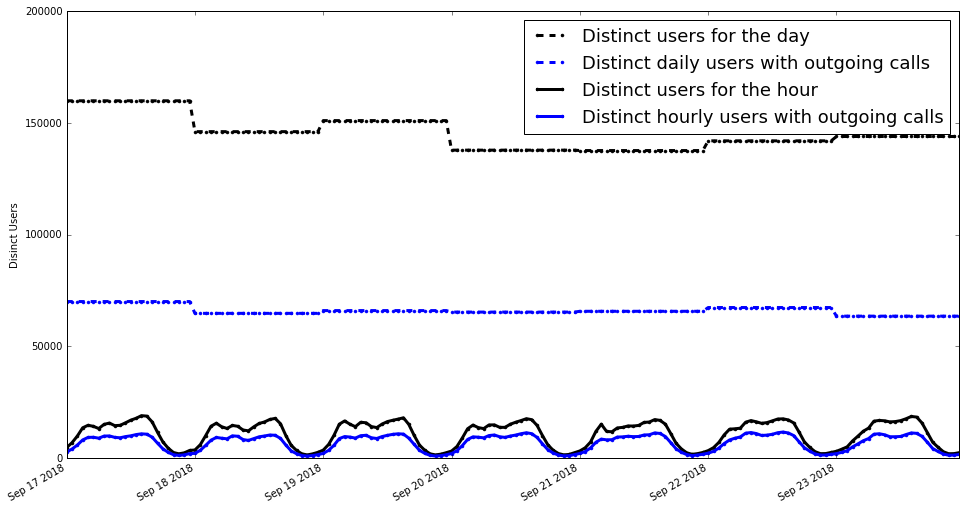

In [7]:
# Plot
plt.figure(figsize=(16,8))
#plt.xlim([np.min(dates)-0.05,736460-0.3])
plt.ylim([0,200000])

#region = 'Andhra Pradesh'
region = 'All Regions'
#provider = 'Ola Cabs'
provider = 'Uber'
yval11 = 'Distinct users for the hour'
yval21 = 'Distinct hourly users with outgoing calls'
yval12 = 'Distinct users for the day'
yval22 = 'Distinct daily users with outgoing calls'
yval13 = 'Distinct users for the week'
yval23 = 'Distinct weekly users with outgoing calls'

plt.ylabel('Disinct Users')

cut = (df['Provider']==provider) & (df['Region']==region)
dfp = df[cut]
plt.plot_date(dfp['Date_num'], dfp[yval12], marker='.', color='black',lw=3,ls='--',label=yval12)
plt.plot_date(dfp['Date_num'], dfp[yval22], marker='.', color='blue' ,lw=3,ls='--',label=yval22)
plt.plot_date(dfp['Date_num'], dfp[yval11], marker='.', color='black',lw=3,ls='-',label=yval11)
plt.plot_date(dfp['Date_num'], dfp[yval21], marker='.', color='blue' ,lw=3,ls='-',label=yval21)
#plt.plot_date(dfp['Date_num'], dfp[yval13], marker='.', color='black',lw=3,ls='-',label=yval13)
#plt.plot_date(dfp['Date_num'], dfp[yval23], marker='.', color='blue' ,lw=3,ls='--',label=yval23)

plt.setp(plt.gca().get_xticklabels(), rotation=30, horizontalalignment='right')
plt.legend(loc='best',prop={"size": 18})
plt.show()
